## Линейная регрессия

In [298]:
import pandas as pd
dataset = pd.read_csv('Fish.csv')

In [337]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### постараемся предсказать вес рыбы по другим параметрам

In [338]:
y = dataset['Weight'].values
x = dataset[['Length1','Length2', 'Length3','Height','Width']].values

### нормализуем данные

In [339]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

(array([27., 32., 13., 18.,  6.,  6., 12.,  6., 12.,  4.,  5.,  6.,  6.,
         2.,  0.,  1.,  0.,  0.,  1.,  2.]),
 array([-1.1162267 , -0.88503765, -0.65384861, -0.42265957, -0.19147053,
         0.03971852,  0.27090756,  0.5020966 ,  0.73328564,  0.96447468,
         1.19566373,  1.42685277,  1.65804181,  1.88923085,  2.1204199 ,
         2.35160894,  2.58279798,  2.81398702,  3.04517606,  3.27636511,
         3.50755415]),
 <a list of 20 Patch objects>)

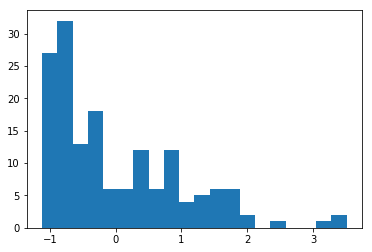

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y, bins=20)

In [341]:
import numpy as np
np.random.seed(42)

### 
Данные нужно разделить в отношении 80/20 на обучающую и валидационную выборки. 

In [342]:
pivot = int(len(y) * 0.8)
index = np.arange(len(dataset))
np.random.shuffle(index)

train_index, val_index = index[:pivot], index[pivot:]

y_train, y_val = y[train_index], y[val_index]
x_train, x_val = x[train_index], x[val_index]

In [343]:
import tensorflow as tf

### Инициализация

Воспользуйтесь x.shape, чтобы задать правильную размерность вектора с параметрами. Проинициализируйте его случайными значениями.

**Значение сдвига** `b = 0`; часто сдвиг или вектор сдвигов инициализируют нулями или средним по выборке значением, если оно отлично от нуля.

In [344]:
import random
x.shape[1:]

(5,)

In [345]:
initial_value = tf.random.normal(shape=(5,))
w = initial_value

In [346]:
#x = tf.Variable
#initial_value = np.array([random.randint(0,100) for i in range(5)])
#w = initial_value.astype('float32')
b = tf.Variable(0, dtype=tf.float32)
learning_rate = tf.constant(1e-4)

In [347]:
w.shape

TensorShape([5])

In [348]:
w.dtype


tf.float32

In [349]:
def fit(x, y, w, threshold=0.001, n_steps=10000):
  x = tf.constant(x, dtype=tf.float32)
  y = tf.constant(y, dtype=tf.float32)

  for step in range(n_steps):
    loss = train_step(x, y, w)
    if loss < threshold:
      break
    if (step + 1) % 50 == 0:
      print(f"Loss at {step} iter. is {loss.numpy()}")
  return loss

### Train step

Дополните `train_step` так, чтобы функция вычисляла значение $\hat{y}$ для переданного $x$, и затем значение функции ошибки с помощью функции `calc_loss`.

Добавитье обновление параметров в строчке `w = ...`. *Если возвращаемое значение* функции ошибки равно `nan` или `inf`, подумайте, что могло привести к такой ситуации и что нужно исправить.

In [350]:
def train_step(x, y, w):
    with tf.GradientTape() as tape:
    
    #print(f'{x.dtype} + {w.dtype}')
        y_hat = tf.tensordot(x, w, 1)
        loss = calc_loss(y, y_hat)
        print(loss)
        grads = tape.gradient(loss, w)
        print(grads)
    
    w = w - grads
    return loss

In [351]:
w.dtype

tf.float32

Умножение вектора на вектор или вектора на строку в `tf` - это сложная операция. В отличие от матричного умножения, которое можно записать просто как `C = A @ B` или `C = tf.matmul(A, B)`, здесь нужно вызывать функцию `tf.tensordot`, которая способна умножать тензоры любой размерности. Затем функции надо указать ось, по которой выполняется сложение: в данном случае, 1 - т.е. для произведения матрицы на вектор нужно выполнить операцию

`tf.tensordot(x, w, 1)`

Воспользовавшись этим способом, напишите модель для линейной регрессии. Кстати, это не единственный возможный вариант [расчета скалярного произведения в tensorflow](https://stackoverflow.com/questions/40670370/dot-product-of-two-vectors-in-tensorflow).

In [352]:
def model(x):
  ...

Напишите функцию, которая вычисляет значение MSE для двух переданных векторов со значениями $y, \hat{y}$ (истинные и спрогнозированные значения). Функция должна возвращать _одно_ значение (скаляр), как и в формуле $\frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - \hat{y}^{(i)})^2$ 

* разность векторов и возведение в квадрат можно сделать при помощи обычных операторов `-`, `**2`
* Для того, чтобы в тензорфлоу выполнить аналог операции $\frac{1}{n}\sum_{i=1}^n (...)$, воспользуйтесь функцией `tf.reduce_mean`. Заодно можете изучить, какие еще есть `tf.reduce_...` функции :)

In [353]:
def calc_loss(y, y_hat):
    x = tf.reduce_mean(y - y_hat)**2
    return(x)

## обучим модель

In [354]:
zu = x
zu.reshape(159,5)
zu[1]

array([ 0.29774487,  0.46298639,  0.81502268, -0.52989962, -1.11718236])

In [355]:
fit(zu[1], y_train, w)

tf.Tensor(0.258624, shape=(), dtype=float32)
None


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.